In [3]:
import editdistance as ed
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

from collections import Counter, OrderedDict

import pickle

In [4]:
def find_closest(d, init_item):
    '''finds closest in dictionary d to init item'''
    min_ed = 999
    answ_item = [-1, -1]
    for comp_item in d.keys():
        dist = ed.eval(init_item, comp_item)
        if dist < min_ed:
            min_ed = dist
            answ_item = (min_ed, comp_item)

    return answ_item

In [35]:
def squash(od, t, verbose =False):
    answ = OrderedDict()
    sp_to_n = {}
    index = 0
    
    for init_item in tqdm_notebook(od.items()):
        #ord_dict.pop(init_item[0])

        if len(answ) == 0 :
            if verbose: print("new spacer:", init_item[0], init_item[1])
            answ[init_item[0]] = init_item[1]
            sp_to_n[init_item[0]] = index
            index += 1
        else:
            min_ed, answ_item = find_closest(answ, init_item[0])
            if min_ed < t:
                if verbose: print("add:", init_item[0], "to", answ_item, )
                answ[answ_item] += init_item[1]
                sp_to_n[init_item[0]] = sp_to_n[answ_item]
                
            else:
                if verbose: print("new spacer:", init_item[0], init_item[1])
                sp_to_n[init_item[0]] = index
                index += 1
                answ[init_item[0]] = init_item[1]
                
    return answ, sp_to_n

            

In [29]:
LEN = 1000

In [30]:
# pairs_path = "../../data/ES/ES3_R1_pairs.txt"
# lines_path = "../../data/ES/ES3_R1_spacers.txt"

pairs_path = "../../data/ES/ES2_R1_pairs.txt"
lines_path = "../../data/ES/ES2_R1_spacers.txt"

# pairs_path = "../data/ES/ES5_R1_pairs.txt"
# lines_path = "../data/ES/ES5_R1_spacers.txt"

# pairs_path = "../../data/SlO_10/SlO1_R1_pairs_10.txt"
# lines_path = "../../data/SlO_10/SlO1_R1_spacers_10.txt"

# pairs_path = "../../data/Sasha/Sasha1_pairs.txt"
# lines_path = "../../data/Sasha/Sasha1.fasta"

#pairs_path = "../data/Thermus/III/Vesuvius (1)_III_pairs.txt"
#lines_path = "../data/Thermus/III/Vesuvius (1).III.txt"

with open(lines_path) as f:
    lines = [x[:LEN] for x in f.readlines()][1::] #CAREFULLLL

with open(pairs_path) as f:
    pairs = [[y[:LEN] for y in x[:-2].split(' ') ] for x in f.readlines()]

lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])
    
print(len(lines))

118028


In [31]:
def counter_to_ordered_dict(counter):
    ord_dict = OrderedDict()

    u_lines = []
    counts = []
    for item in counter.items():
        u_lines.append(item[0])
        counts.append(item[1])

    u_lines = np.array(u_lines)
    counts = np.array(counts)

    args_s = np.argsort(counts)[::-1]

    for l, c in zip(u_lines[args_s], counts[args_s]):
        ord_dict[l] = c
    
    return ord_dict

In [32]:
counter = Counter(lines)

ord_dict = counter_to_ordered_dict(counter)

In [36]:
sp_to_n = {}

nd, sp_to_n = squash(ord_dict, 6, 0)

cl_to_n = {}
n_to_clust = {}
for i, it in enumerate(nd.items()):
    cl_to_n[it[0]] = i
    n_to_clust[i] = it[0]

A Jupyter Widget

In [12]:
u_lines[np.argsort(counts)[::-1]]

array(['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC',
       'CTGTTTTCGCAAATCTATGGACTATTGCTAT',
       'GAAATGCTGGTGAGCGTTAATGCCGCAAACAC', ...,
       'CAGCGTCGGGCGTGAAATCTCACCGTCGTTGC',
       'GTAGTCCATCATTCCACCTATGTCTGATCTC',
       'TCGGTTCAGGCATTGCAAACCTGGCTACCGG'], dtype='<U53')

In [ ]:
for i in range(50):
    _ = plt.hist([ed.eval(x, u_lines[i]) for x in u_lines], bins = 20, alpha = 0.5)
    
plt

<module 'matplotlib.pyplot' from '/home/anton/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [49]:
counts_ES1 = counts


A Jupyter Widget

Text(0.5,0,'Editdistance')

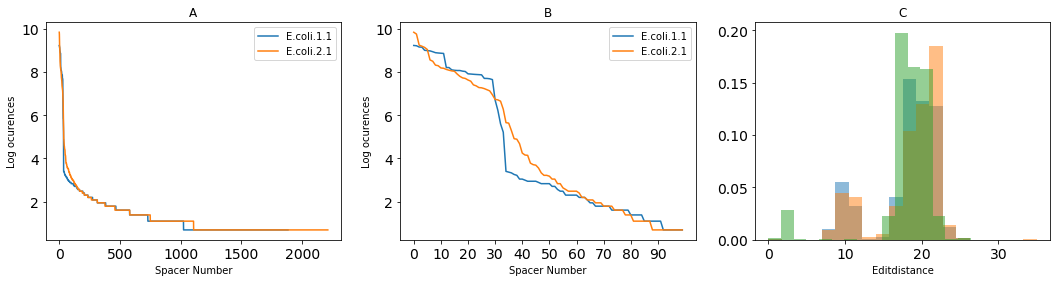

In [106]:
#plt.figure(figsize = (10, 5))
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (18,4))#, sharey = True)


ax1.plot(sorted(np.log(counts_ES1 + 1))[::-1], label = 'E.coli.1.1')
ax1.plot(sorted(np.log(counts + 1))[::-1], label = 'E.coli.2.1')


ax2.plot(sorted(np.log(counts_ES1 + 1)[:100])[::-1], label = 'E.coli.1.1')
ax2.plot(sorted(np.log(counts + 1)[:100])[::-1], label = 'E.coli.2.1')
#ax2.tick_params()

plt.sca(ax2)
_ = plt.xticks(np.arange(0, 100, 10))
plt.xlabel("Spacer Number")
plt.ylabel("Log ocurences")
plt.legend()
plt.title("B")
plt.tick_params(labelsize = 14)

plt.sca(ax1)
#_ = plt.xticks(np.arange(0, 100, 5))
plt.xlabel("Spacer Number")
plt.ylabel("Log ocurences")
plt.legend()
plt.title("A")
plt.tick_params(labelsize = 14)

plt.sca(ax3)
for i in tqdm_notebook(range(87, 90)):
    _ = plt.hist([ed.eval(x, u_lines[i]) for x in u_lines], bins = 20, alpha = 0.5, normed=1)
plt.tick_params(labelsize = 14)
plt.title("C")
plt.xlabel("Editdistance")

In [110]:
u_lines[87]

'AGTGCTGGACCATTTCAAATAGCTGTGATTTACCT'

In [109]:
u_lines[88]

'AGTGCTGGACCATTTCAAATAGCTGTGATTTACCTA'

In [112]:
from sklearn.cluster import KMeans

In [118]:
lens_0 = [ed.eval(x, u_lines[0]) for x in u_lines] + [ed.eval(x, u_lines[1]) for x in u_lines] + [ed.eval(x, u_lines[3]) for x in u_lines]

In [119]:
km = KMeans(2)
km.fit(np.array(lens_0).reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [120]:
km.cluster_centers_

array([[19.28784441],
       [ 1.98081023]])

In [121]:
(1.98 + 19.3 )/ 2

10.64

OrderedDict([('GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC', 20411),
             ('ACACGCCCTTATCAAATAGCTGTGATTTACCT', 28376),
             ('CAAGTGATATCCATCATCGCATCCAGTGCGCC', 11314),
             ('ATAGACCCCGAACAACAATACGCGCAAACCG', 13972),
             ('AGTGCTGGACCATTTCAAATTCACAATAGAT', 14351),
             ('GGAATGATATTTCAATAAATAATTATAACAA', 8387),
             ('TACCGTACAGACTGCCGGATATTATTTTTTT', 7671),
             ('CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA', 6274),
             ('AGCTGGGCGAAATTTTGATTCATCGTGATGA', 3740),
             ('CCCTCACACCGATTCGCCAAACGGTGGAGAA', 6862),
             ('AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG', 4979),
             ('CCGTAAGTGGTTTGAGCGATGATATTTGTGC', 2390),
             ('TGCATGGCTTTGGCTTCCTCTTTGACGGACG', 3798),
             ('TATAGAGATCGTTTTTGGAATTTACAGCGAGG', 3706),
             ('TTTTACAGTGTCAACAATCGTTCCCTGATTG', 2611),
             ('ATATATCAGAGCAAAAAACAAAGCCACAGCC', 2920),
             ('CATAAAGAAACTATTTTGCGTTTCGTTCAGGT', 2763),
             ('CCGCCGTTGGCACCGTCAAACTC

In [57]:
pairs_n = [process_pair(p, cl_to_n) for p in tqdm_notebook(pairs)]

A Jupyter Widget

In [53]:
def process_pair(pair, cl_to_num, t = 6):
    try:
        return [cl_to_n[find_closest(cl_to_num, pair[0])[1]], cl_to_n[find_closest(cl_to_num, pair[1])[1]]]
    except:
        return [-1, -1]

In [58]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2 and sum(p) != -2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

0

In [64]:
n_to_clust[8]

'CAAGTGATATCCATCATCGCATCCAGTGCGCC'

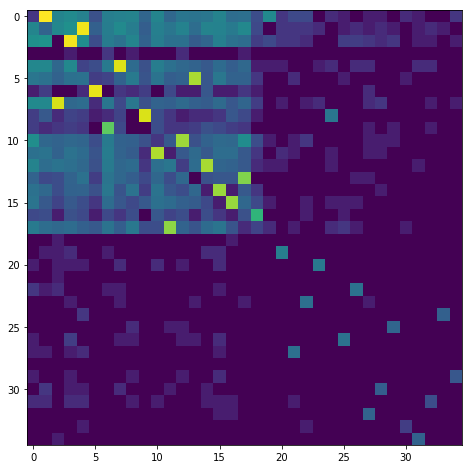

In [62]:
plt.figure(figsize=(8,8))
plt.imshow(np.log(graph+1)[:35, :35 ])
plt.show()

In [13]:
np.save("../../data/graphs/ES1", graph)

In [21]:
graph.sum(1).astype(int)

array([10284, 19559,  5495,  4218, 10761,  3242,  3342,  3380,  2544,
        2156,  1486,    10,  2049,  1384,  1461,   876,     7,  1098,
         142,   297,   124,    88,   105,    82,    23,    46,    61,
          71,    65,     1,    54,    41,    34,    21,     0,     0,
           0,     1,     9,     0,     0,     1,     0,     0,     0,
           1,     1,     0,     1,     1,     0,     1,     0,     0,
           0,     0,     2,     1,     1])

In [15]:
# pickle.dump(nd, open("../data/dicts/Vesuvious_III_counts_22", 'wb'))
# pickle.dump(sp_to_n, open("../data/dicts/Vesuvious_III_sp_to_n_22", 'wb'))
# pickle.dump(n_to_clust, open("../data/dicts/Vesuvious_III_n_to_cl_22", 'wb'))

In [96]:
graph[:17, : 17].sum() / graph[17:35,17:35].sum() 

71.32494969818913

In [97]:
big_w = graph[np.arange(graph.shape[0]),graph.argmax(1)].astype(int)

In [98]:
big_w[:17].sum() / (big_w[17:35].sum() + 200)

28.799635701275047

In [100]:
graph.argmax(1)[:17]

array([ 3,  0,  5,  6,  2,  7,  8, 11,  9, 10, 13,  0, 16, 14, 15, 17, 10])

In [27]:
len(nd)

85

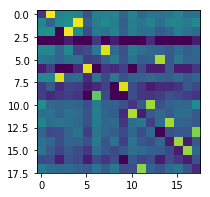

In [18]:
plt.figure(figsize=(3,3))
plt.imshow(np.log(graph+1)[:18, : 18])
plt.show()

In [25]:
gr0 = np.zeros_like(graph)

In [26]:
for i in range(19):
    gr0[i, graph[i].argmax()] = 1

In [28]:
gr0[3] = 0
#gr0[17] = 0

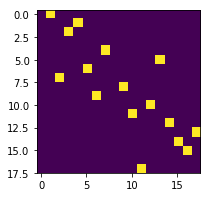

In [29]:
plt.figure(figsize=(3,3))
plt.imshow(gr0[:18, : 18])
plt.show()

In [31]:
graph[gr0 == 0].sum() / graph[gr0 != 0].sum()

0.11443894701061298

In [32]:
1 / 0.11

9.090909090909092

In [34]:
grE = np.load("../../data/graphs/ES4_22.npy")[:35][:35]

In [37]:
grE[:18, :18].sum() / grE[18:, 18:].sum() 

64.32803468208093